## Title:Detection of Recurrence-Events In Breast Cancer Using Decision Tree Classfier

## Introduction

Data mining is a tool used in business intelligent to check for patterns in the dataset in order to determine meaningful information. In this project, we will be using the application of data mining techniques to create a prredictive model for the detection of recurrence event for Breast cancer. 

## Introduction to Dataset

The breast cancer dataset provided by the Oncology Institute would be used for this project. The dataset can be found from the machine learning Repository  (<a href="http://archive.ics.uci.edu/ml/datasets/Breast+Cancer"> view dataset </a>) and it is made up 201 instances which are of 9 attributes and a class attributes. The attributes information are explained below:

1.Age <br />
This is a numerical and categorical attribute describing the age of the patient, the age has been classified into range <br />. The variables in the attributes are :10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99. <br />

2.Menopause <br />
 This attribute describe the menopause status of the patient, the variables in the attributes are: lt40, ge40, premeno <br />
3. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
4. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
5. node-caps: yes, no.
6. deg-malig: 1, 2, 3.
7. breast: left, right.
8. breast-quad: left-up, left-low, right-up, right-low, central.
9. irradiat: yes, no.


## Input Encoding/ Input Representation

Because most attributes in the dataset are in categorical, some attributes with fewer variables like irradiat were represented by numerical integers. This is shown below
 yes -1 <br />
 no  -0 <br />

while others with many variables were represented with dummies variables. Dummies Representation is the process of transforming data into 1s and 0s 

## Coding for the Implementation with Comments

The implementation of the decision tree classifier to the data set is explained the the section below. First, the necessary libraries was installed using PIP. then the data was imported with pandas library and the input encoding method was used to transform the data

In [1]:
!pip install numpy matplotlib scikit-learn pandas pydotplus graphviz

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

C:\Users\lantop\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


setting columns 

In [9]:
data=pd.read_csv("breast-cancer.data")
data.columns=["Class","age","menopause","tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"]

check for missing data or unknown variabes 

In [10]:
pd.unique(data["age"])

array(['40-49', '60-69', '50-59', '30-39', '70-79', '20-29'], dtype=object)

In [11]:
pd.unique(data["menopause"])

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [12]:
pd.unique(data["tumor-size"])

array(['20-24', '15-19', '0-4', '25-29', '50-54', '10-14', '30-34',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [13]:
pd.unique(data["inv-nodes"])

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
      dtype=object)

In [14]:
pd.unique(data["node-caps"])

array(['no', 'yes', '?'], dtype=object)

In [15]:
pd.unique(data["deg-malig"])

array([2, 1, 3], dtype=int64)

In [16]:
pd.unique(data["breast"])

array(['right', 'left'], dtype=object)

In [17]:
pd.unique(data["breast-quad"])

array(['right_up', 'left_low', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

In [18]:
pd.unique(data["irradiat"])

array(['no', 'yes'], dtype=object)

remove he unknown variable ("?") from the data

In [19]:
data=data.replace("?",np.nan)
data=data.dropna()

In [20]:
def numerical(df):
    dfs=[i for i in (pd.unique(df))]
    for i in range(len(dfs)):
    
        df=df.replace(dfs[i],i)
    
    return df  

def getnumerical(data,attributes):
    
    datanew=numerical(data[attributes[0]])
    datanew=datanew.to_frame()
    for i in attributes[2:]:
        
        datanew=datanew.join(numerical(data[i]))
    return datanew    

process the dataset by encoding attributes with few variables with numerical and encoding attributes with many variables with dummies

In [21]:
data

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [22]:
X=pd.get_dummies(data["age"]).join(pd.get_dummies(data["menopause"])).join(pd.get_dummies(data["tumor-size"]))\
  .join(pd.get_dummies(data["inv-nodes"])).join(pd.get_dummies(data["breast-quad"])).join(getnumerical(data,["deg-malig","node-caps","breast","irradiat"]))

In [23]:
X

,20-29,30-39,40-49,50-59,60-69,70-79,ge40,lt40,premeno,0-4,...,6-8,9-11,central,left_low,left_up,right_low,right_up,deg-malig,breast,irradiat
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
281,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,2,1,1
282,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
283,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,2,1,0


set the target class 

In [24]:
Y=data["Class"]
Y

0      no-recurrence-events
1      no-recurrence-events
2      no-recurrence-events
3      no-recurrence-events
4      no-recurrence-events
               ...         
280       recurrence-events
281       recurrence-events
282       recurrence-events
283       recurrence-events
284       recurrence-events
Name: Class, Length: 276, dtype: object

split data into 80% training data and 20% testing data using cross validation indices

In [25]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, shuffle=True)

Train the decision Tree classifier using the training data

In [26]:
#define the parameters for decision tree classifier 
criterion='entropy'
mini_samples_split=4

In [27]:
clf=DecisionTreeClassifier(min_samples_split=mini_samples_split,criterion=criterion)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
x_test.columns

Index(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'ge40', 'lt40',
       'premeno', '0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '5-9', '50-54', '0-2', '12-14', '15-17', '24-26',
       '3-5', '6-8', '9-11', 'central', 'left_low', 'left_up', 'right_low',
       'right_up', 'deg-malig', 'breast', 'irradiat'],
      dtype='object')

In [29]:
dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,
                              filled=True, rounded=True,special_characters=True,
                              feature_names=x_test.columns,class_names=['no-recurrence-events','recurrence-events'])

In [30]:
import os
os.environ['PATH'] +=os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'

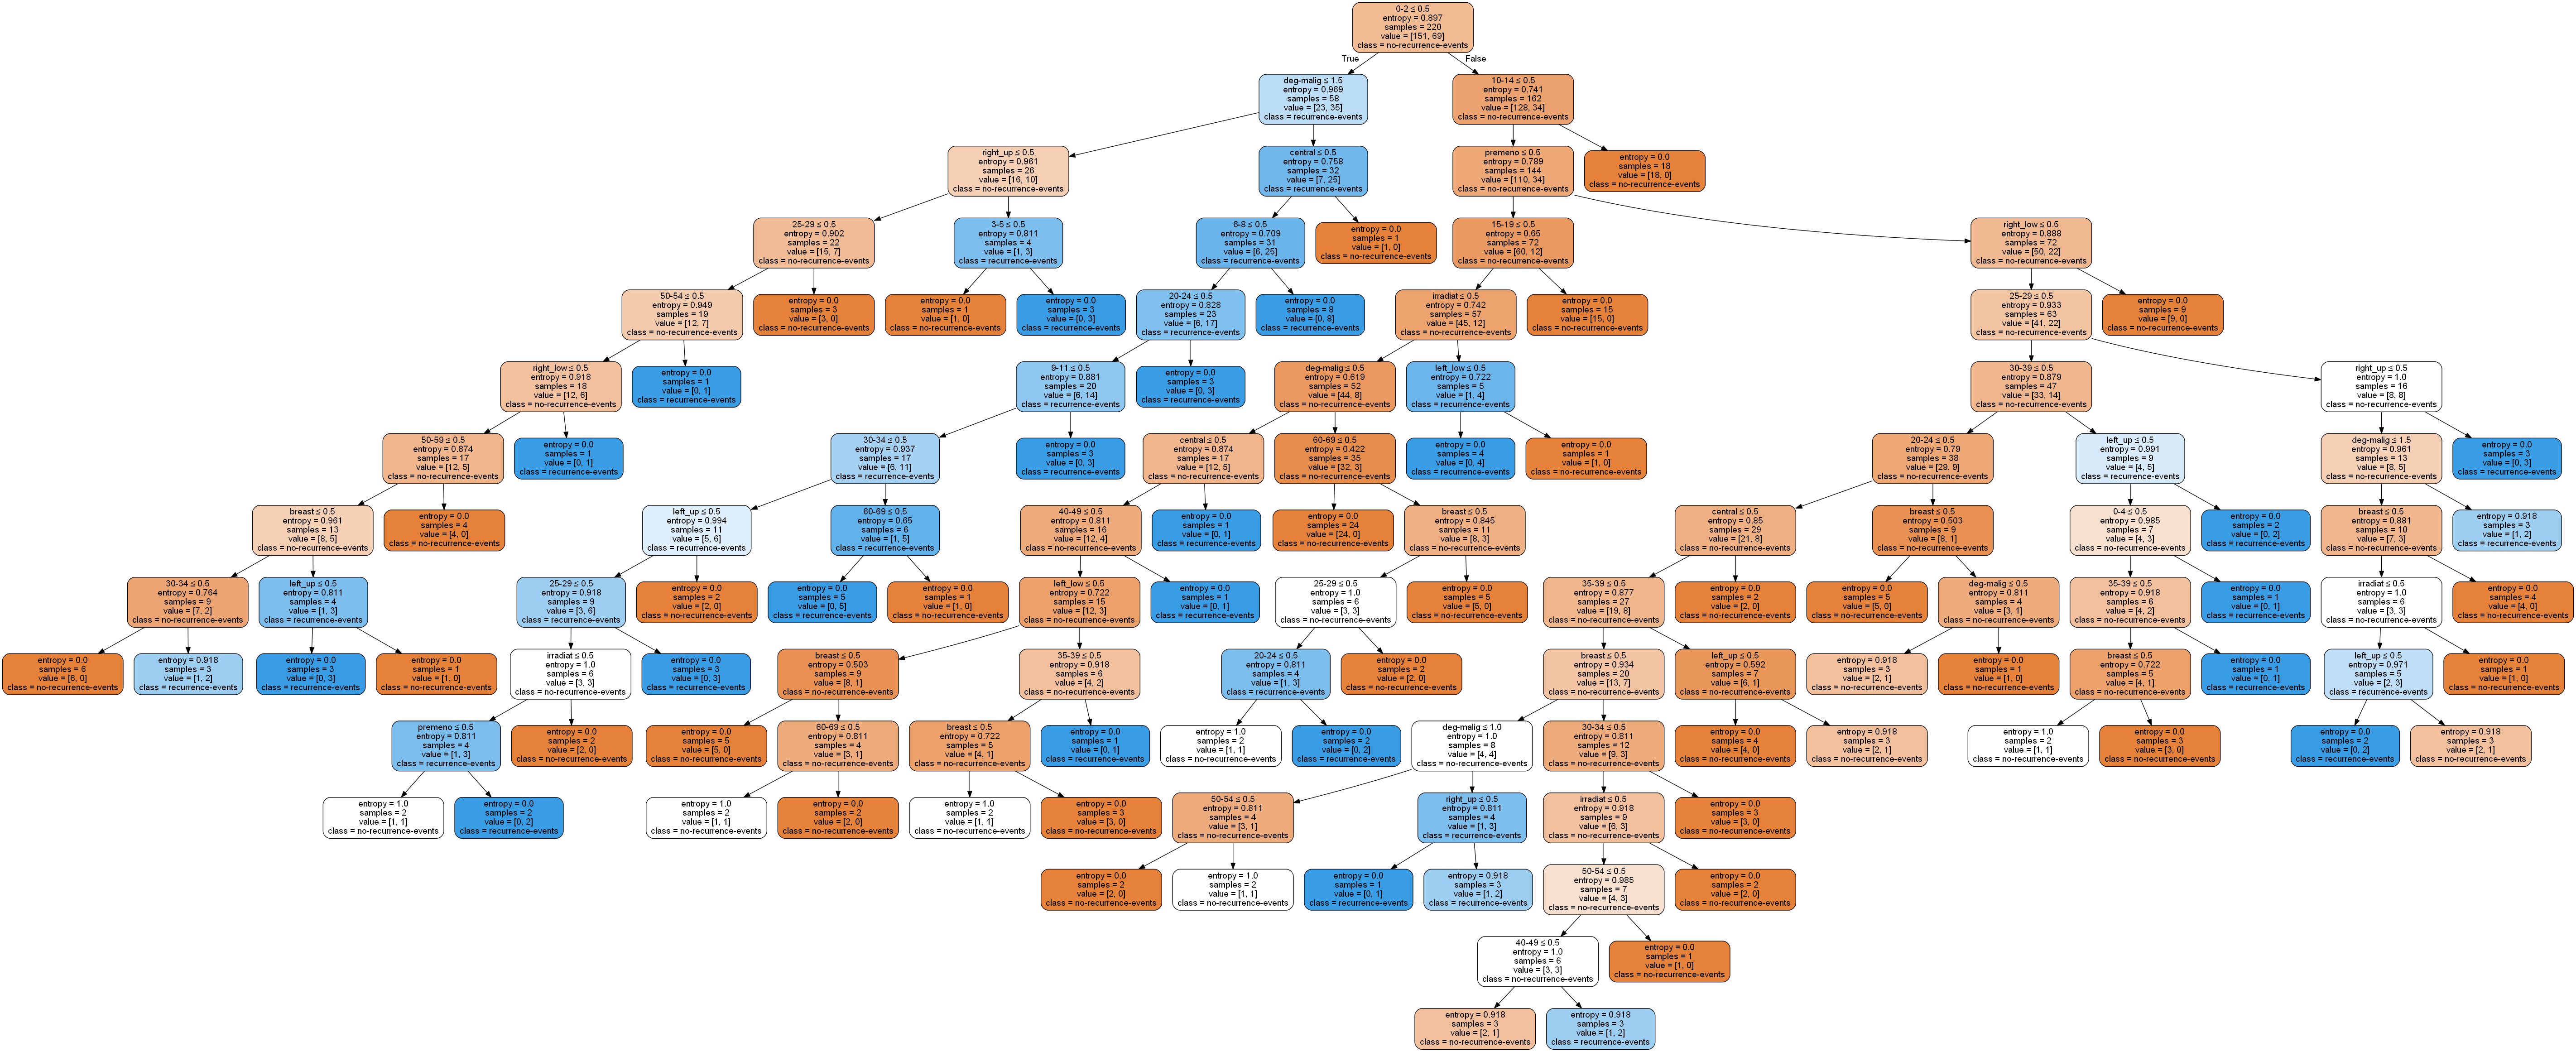

In [31]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Making predictions with the testing data and using the decision tree classifier 

In [32]:
pred=clf.predict(x_test)

## Analysis of Results and Comments

In this section, we will analyse the prediction result. The accuracy of the decision tree model can be calculated by dividing the total number of correct prediction by the total number of test size.

In [33]:
print('Testing Accuracy=',100*np.count_nonzero((y_test==pred).values)/len(y_test))

Testing Accuracy= 75.0


In [34]:
target=[]
for i in y_test:
    if i=="no-recurrence-events":
        target.append(0)
    else:
        target.append(1)
scores=clf.predict_proba(x_test)
fpr,  tpr, thresholds=roc_curve(target, scores[:,1],1)


Text(0, 0.5, 'True Positive Rate')

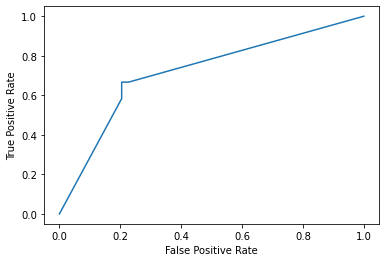

In [35]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")